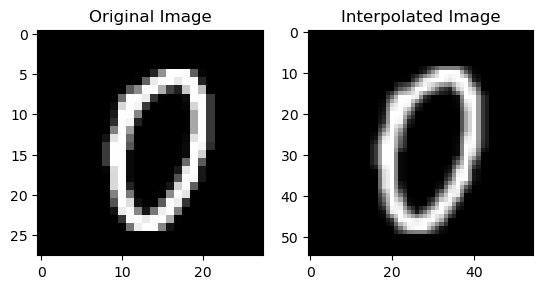

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Function to compute divided differences
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # the first column is y
    
    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i + 1][j - 1] - coef[i][ j - 1]) / (x[i + j] - x[i])
    
    return coef[0, :]  # return only the first row (Newton's coefficients)

# Function to evaluate Newton polynomial at given points
def newton_poly(x, x_data, coef):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x - x_data[n-k]) * p
    return p

# Function to interpolate 1D data using Newton's method
def interpolate_1d(x_vals, y_vals, new_x_vals):
    coef = divided_diff(x_vals, y_vals)
    return newton_poly(new_x_vals, x_vals, coef)

# Function to expand the image array and perform interpolation
def expand_and_interpolate(image_array):
    # Step 1: Expand the matrix with zeros between successive rows and columns
    original_shape = image_array.shape
    expanded_image = np.zeros((original_shape[0] * 2 - 1, original_shape[1] * 2 - 1))

    # Copy original pixels to their corresponding positions in the expanded matrix
    expanded_image[::2, ::2] = image_array

    # Step 2: Interpolate along rows (only between original values)
    for i in range(0, expanded_image.shape[0], 2):  # Interpolate for even indexed rows
        for j in range(1, expanded_image.shape[1], 2):  # Interpolate only between original column values
            x_vals = [j-1, j+1]  # x values for original pixels
            y_vals = [expanded_image[i, j-1], expanded_image[i, j+1]]  # corresponding y values
            new_x_val = j  # new point where we interpolate
            expanded_image[i, j] = interpolate_1d(x_vals, y_vals, new_x_val)  # Interpolate

    # Step 3: Interpolate along columns (including newly interpolated row values)
    for j in range(expanded_image.shape[1]):  # Iterate over each column
        for i in range(1, expanded_image.shape[0], 2):  # Interpolate only between original row values
            x_vals = [i-1, i+1]  # x values for original rows
            y_vals = [expanded_image[i-1, j], expanded_image[i+1, j]]  # corresponding y values
            new_x_val = i  # new point where we interpolate
            expanded_image[i, j] = interpolate_1d(x_vals, y_vals, new_x_val)  # Interpolate

    return expanded_image

# Step 4: Load and process the image
image = cv2.imread(r'D:\GIKI\7th semester\CE442L\Mid exam prep\img.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
image_array = np.array(gray_image)  # Ensure you're working with a 2D grayscale image

# Step 5: Apply the expand and interpolate method
interpolated_image = expand_and_interpolate(image_array)

# Step 6: Visualize the original and interpolated images
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Interpolated Image")
plt.imshow(interpolated_image, cmap='gray')
plt.show()


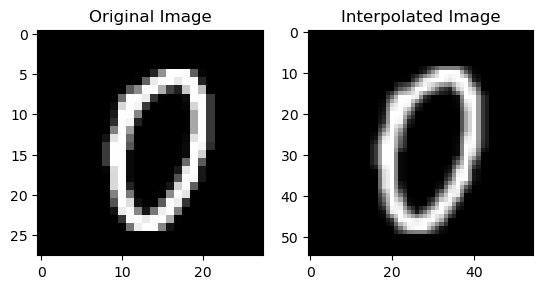

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Function to interpolate using Lagrange interpolation
def lagrange_interpolation(x, y, xp):
    yp = 0
    n = len(x)
    
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p *= (xp - x[j]) / (x[i] - x[j])
        yp += p * y[i]
    
    return yp

# Function to expand the image array and perform interpolation
def expand_and_interpolate_lagrange(image_array):
    # Step 1: Expand the matrix with zeros between successive rows and columns
    original_shape = image_array.shape
    expanded_image = np.zeros((original_shape[0] * 2 - 1, original_shape[1] * 2 - 1))

    # Copy original pixels to their corresponding positions in the expanded matrix
    expanded_image[::2, ::2] = image_array

    # Step 2: Interpolate along rows (only between original values)
    for i in range(0, expanded_image.shape[0], 2):  # Interpolate for even indexed rows
        for j in range(1, expanded_image.shape[1], 2):  # Interpolate only between original column values
            x_vals = [j-1, j+1]  # x values for original pixels
            y_vals = [expanded_image[i, j-1], expanded_image[i, j+1]]  # corresponding y values
            new_x_val = j  # new point where we interpolate
            expanded_image[i, j] = lagrange_interpolation(x_vals, y_vals, new_x_val)  # Interpolate

    # Step 3: Interpolate along columns (including newly interpolated row values)
    for j in range(expanded_image.shape[1]):  # Iterate over each column
        for i in range(1, expanded_image.shape[0], 2):  # Interpolate only between original row values
            x_vals = [i-1, i+1]  # x values for original rows
            y_vals = [expanded_image[i-1, j], expanded_image[i+1, j]]  # corresponding y values
            new_x_val = i  # new point where we interpolate
            expanded_image[i, j] = lagrange_interpolation(x_vals, y_vals, new_x_val)  # Interpolate

    return expanded_image

# Step 4: Load and process the image
image = cv2.imread(r'D:\GIKI\7th semester\CE442L\Mid exam prep\img.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
image_array = np.array(gray_image)  # Ensure you're working with a 2D grayscale image

# Step 5: Apply the expand and interpolate method using Lagrange interpolation
interpolated_image = expand_and_interpolate_lagrange(image_array)

# Step 6: Visualize the original and interpolated images
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Interpolated Image")
plt.imshow(interpolated_image, cmap='gray')
plt.show()


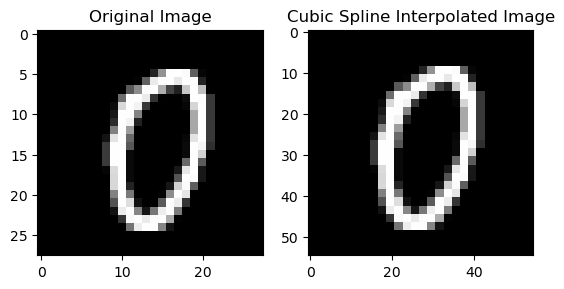

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Natural Cubic Spline function (already provided)
def natural_cubic_spline(x, a):
    n = len(x) - 1
    h = np.diff(x)  # Calculate hi = xi+1 - xi

    # Step 2: Compute alpha values
    alpha = np.zeros(n)
    for i in range(1, n):
        alpha[i] = (3/h[i]) * (a[i+1] - a[i]) - (3/h[i-1]) * (a[i] - a[i-1])

    # Step 3: Initialize l, mu, and z arrays
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    c = np.zeros(n + 1)
    b = np.zeros(n)
    d = np.zeros(n)

    # Step 4: Forward pass to solve tridiagonal system
    for i in range(1, n):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

    # Step 5: Boundary conditions for natural spline
    l[n] = 1
    z[n] = 0
    c[n] = 0

    # Step 6: Back substitution to solve for c, b, d
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])

    return a[:-1], b, c[:-1], d

# Evaluate the cubic spline
def evaluate_spline(x_vals, a, b, c, d, x_points):
    n = len(x_vals) - 1
    spline_x = np.array([])
    spline_y = np.array([])

    for i in range(n):
        x_range = np.linspace(x_vals[i], x_vals[i+1], 100)
        spline_x = np.append(spline_x, x_range)
        spline_y = np.append(
            spline_y,
            a[i] + b[i] * (x_range - x_vals[i]) +
            c[i] * (x_range - x_vals[i]) ** 2 +
            d[i] * (x_range - x_vals[i]) ** 3
        )
    return spline_x, spline_y

# Function to expand the image array and perform cubic spline interpolation
def expand_and_interpolate_cubic_spline(image_array):
    # Step 1: Expand the matrix with zeros between successive rows and columns
    original_shape = image_array.shape
    expanded_image = np.zeros((original_shape[0] * 2 - 1, original_shape[1] * 2 - 1))

    # Copy original pixels to their corresponding positions in the expanded matrix
    expanded_image[::2, ::2] = image_array

    # Step 2: Interpolate along rows (only between original values)
    for i in range(0, expanded_image.shape[0], 2):  # Interpolate for even indexed rows
        for j in range(1, expanded_image.shape[1], 2):  # Interpolate only between original column values
            x_vals = [j-1, j+1]  # x values for original pixels
            y_vals = [expanded_image[i, j-1], expanded_image[i, j+1]]  # corresponding y values
            a, b, c, d = natural_cubic_spline(x_vals, y_vals)
            expanded_image[i, j] = evaluate_spline(x_vals, a, b, c, d, j)[1][-1]  # Interpolate

    # Step 3: Interpolate along columns (including newly interpolated row values)
    for j in range(expanded_image.shape[1]):  # Iterate over each column
        for i in range(1, expanded_image.shape[0], 2):  # Interpolate only between original row values
            x_vals = [i-1, i+1]  # x values for original rows
            y_vals = [expanded_image[i-1, j], expanded_image[i+1, j]]  # corresponding y values
            a, b, c, d = natural_cubic_spline(x_vals, y_vals)
            expanded_image[i, j] = evaluate_spline(x_vals, a, b, c, d, i)[1][-1]  # Interpolate

    return expanded_image

# Step 4: Load and process the image
image = cv2.imread(r'D:\GIKI\7th semester\CE442L\Mid exam prep\img.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
image_array = np.array(gray_image)  # Ensure you're working with a 2D grayscale image

# Step 5: Apply the expand and interpolate method using cubic spline interpolation
interpolated_image = expand_and_interpolate_cubic_spline(image_array)

# Step 6: Visualize the original and interpolated images
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Cubic Spline Interpolated Image")
plt.imshow(interpolated_image, cmap='gray')
plt.show()
